## Use Case 4: Analyze OC CCI data

In [1]:
# Needed in IPython notebook only
from IPython.display import Image   
%matplotlib inline

from nansat import *

### Open OC CCI data remotely and fetch array with chlorophyll-a values

In [ ]:
# open data on THREDDS
n1 = Nansat('https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v2.0-MONTHLY', date='2010-06-01')

# 
d = Domain(NSR().wkt, '-te -20 50 10 70 -tr 0.01 0.01')
n.reproject(d)

# get matrix with chlorophyll and show
chlor_a1 = n1['chlor_a']
plt.figure(figsize=(7,7))
plt.imshow(chlor_a1)

WKT: GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]
x/ySize 8640 4320
(-179.9792, 0.041671753, 0, 89.979156, 0, -0.041664124)


### Create map with chlorophyll-a

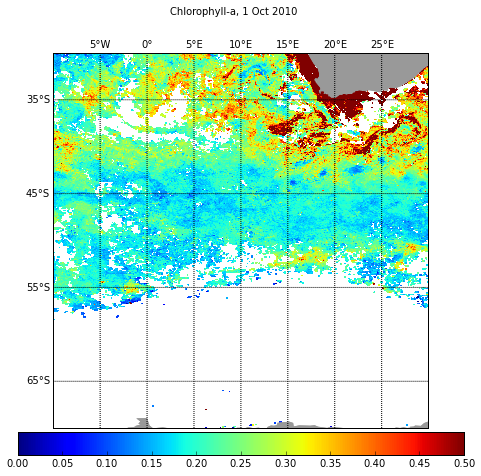

In [4]:
# create map from the Nansat object
nmap = Nansatmap(n1, resolution='l')

# make plot chlrophyll (color) and add colorbar
nmap.pcolormesh(chlor_a1, vmin=0, vmax=0.5)
nmap.add_colorbar(fontsize=10)

# add continents on top
nmap.draw_continents()

# draw grid of parallels and meridians
# at given locations
nmap.drawparallels([-65, -55, -45, -35], labels=[1,0,0,0])
nmap.drawmeridians([-5, 0, 5, 10, 15, 20, 25], labels=[0,0,1,0])

# add title
plt.suptitle('Chlorophyll-a, 1 Oct 2010')

# set size of the figure (inches)
nmap.fig.set_figheight(8)
nmap.fig.set_figwidth(8)

# save figure to a PNG file
nmap.save('usecase4a.png')

### Plot zonal average

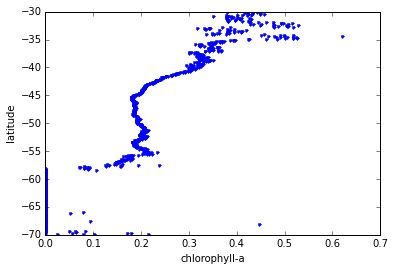

In [5]:
# get grids of longitude and latitude
lon, lat = n1.get_geolocation_grids()

# calculate zonal average (i.e. averae chlorophyll along parallels)
zonalAverage = np.nanmean(chlor_a1, axis=1)

# simple plot
plt.plot(zonalAverage, lat[:, 0], '.')
plt.xlabel('chlorophyll-a')
plt.ylabel('latitude')


## Analyze time series of chlorophyll-a

### Create list of dates and filenames

In [6]:
# example of datetime library
import datetime
dt0 = datetime.datetime(2010,1,1)
dt1 = dt0 + datetime.timedelta(8)
print dt0, dt1
print dt0.strftime('%Y-%m-%d')

2010-01-01 00:00:00 2010-01-09 00:00:00
2010-01-01


In [7]:
period = 100 # days
step = 8     # days
dt0 = datetime.datetime(2010,1,1)

# typical for other languages
#dates = []
#for d in range(0, period, step):
#    dt1 = dt0 + datetime.timedelta(d)
#    dates.append(dt1)

# list comprehensions are VERY convenient
# list of dates
dates = [dt0 + datetime.timedelta(d) for d in range(0, period, step)]

# list of strings representing dates
dateStrings = [date.strftime('%Y-%m-%d') for date in dates]
print dateStrings

['2010-01-01', '2010-01-09', '2010-01-17', '2010-01-25', '2010-02-02', '2010-02-10', '2010-02-18', '2010-02-26', '2010-03-06', '2010-03-14', '2010-03-22', '2010-03-30', '2010-04-07']


In [8]:
# list of filenames
filenames = ['occci_online:8D:chlor_a:%s' % date for date in dateStrings]
print filenames

['occci_online:8D:chlor_a:2010-01-01', 'occci_online:8D:chlor_a:2010-01-09', 'occci_online:8D:chlor_a:2010-01-17', 'occci_online:8D:chlor_a:2010-01-25', 'occci_online:8D:chlor_a:2010-02-02', 'occci_online:8D:chlor_a:2010-02-10', 'occci_online:8D:chlor_a:2010-02-18', 'occci_online:8D:chlor_a:2010-02-26', 'occci_online:8D:chlor_a:2010-03-06', 'occci_online:8D:chlor_a:2010-03-14', 'occci_online:8D:chlor_a:2010-03-22', 'occci_online:8D:chlor_a:2010-03-30', 'occci_online:8D:chlor_a:2010-04-07']


### Read chlorophyll from each remote file

In [9]:
# define smaller area of interest
lons=[10, 20]
lats=[-55, -50]

chloraArrays = []
for filename in filenames:
    print filename
    n = Nansat(filename, lons=lons, lats=lats)
    chlor_a = n[1]
    chloraArrays.append(chlor_a)

# equal to
#chloraArrays = [Nansat(filename, lons=lons, lats=lats)[1] for filename in filenames]
# but we want to print filename for logging

06:28:43|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-01-01, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-01-01, trying to read with Nansat mappers...


occci_online:8D:chlor_a:2010-01-01
occci_online:8D:chlor_a:2010-01-09

06:28:43|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-01-09, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-01-09, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-01-17, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-01-17, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-01-25, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-01-25, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-02-02, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-02-02, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-01-17
occci_online:8D:chlor_a:2010-01-25
occci_online:8D:chlor_a:2010-02-02
occci_online:8D:chlor_a:2010-02-10

06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-02-10, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-02-10, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-02-18, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-02-18, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-02-26, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-02-26, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-03-06, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-03-06, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-02-18
occci_online:8D:chlor_a:2010-02-26
occci_online:8D:chlor_a:2010-03-06
occci_online:8D:chlor_a:2010-03-14

06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-03-14, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-03-14, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-03-22, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-03-22, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-03-30, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-03-30, trying to read with Nansat mappers...
06:28:44|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2010-04-07, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2010-04-07, trying to read with Nansat mappers...



occci_online:8D:chlor_a:2010-03-22
occci_online:8D:chlor_a:2010-03-30
occci_online:8D:chlor_a:2010-04-07


In [10]:
# convert list of arrays into 3D array
chloraArrays = np.array(chloraArrays)
print chloraArrays.shape

(13, 120, 240)


### Create Hovmoller plot (chlorophyll in latitude/time space)

(13, 240)


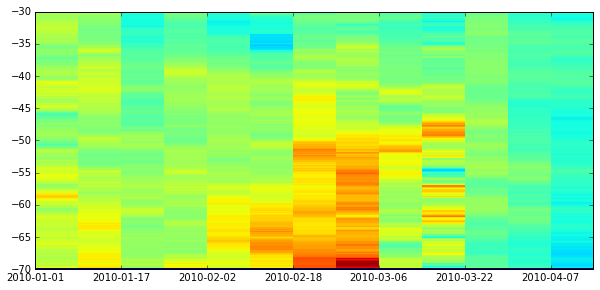

In [11]:
# calculate zonal averages for each time step
zonalAverages = np.nanmean(chloraArrays, axis=1)
print zonalAverages.shape

# show the matrix
plt.figure(figsize=(10,10))
plt.imshow(zonalAverages.T,
           interpolation='nearest',
           aspect=.15,
           extent=[0, len(dates), lat.min(), lat.max()],
           vmin=0,
           vmax=0.6)
ticks = plt.xticks(range(0,len(dates),2), dateStrings[::2])

### Create plot of averages with standard deviations

In [12]:
# calculate average and standard deviation
chlorAvg = np.nanmean(zonalAverages, axis=1)
chlorStd = np.nanstd(zonalAverages, axis=1)

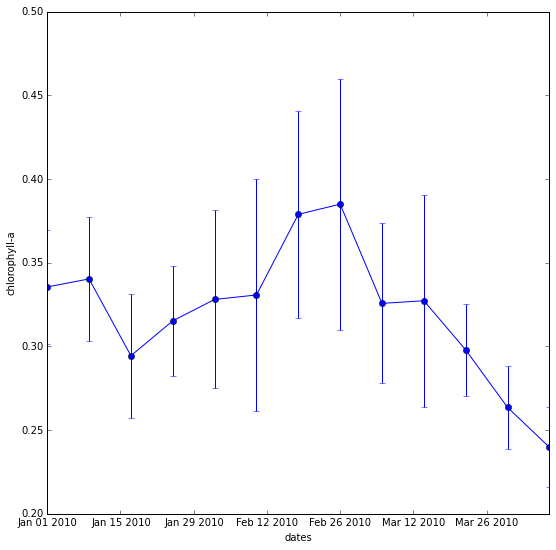

In [13]:
# plot as error bar
plt.figure(figsize=(9,9))
plt.errorbar(dates, chlorAvg, chlorStd, fmt='o-')
plt.xlabel('dates')
plt.ylabel('chlorophyll-a')
